In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd


wine = load_wine()

X = wine.data
y = wine.target
num_samples, num_features = wine.data.shape
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df_wine.head())
print(f"Liczba próbek: {num_samples}")
print(f"Liczba cech: {num_features}")

print("\nNazwy cech:")
for i, feature_name in enumerate(wine.feature_names):
    print(f"  {i+1}. {feature_name}")

print("\nRozkład klas:")
unique_classes, counts = np.unique(wine.target, return_counts=True)
for class_label, count in zip(unique_classes, counts):
    print(f"  Klasa {wine.target_names[class_label]}: {count} próbek")

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print("Standaryzacja")
print(f"\nPrzed: średnie = {X.mean(axis=0)}")
print(f"Po:    średnie = {X_std.mean(axis=0)}")
print("Standaryzację należy wykonać, aby nie dopuścić do dominacji zmiennych, których wartości mają większą wariancję. Gdyby nie to, to składowe główne odzwierciedlałyby cechy o większej skali")

pca = PCA()
X_pca = pca.fit_transform(X_std)

print("\nWyniki PCA")

print("\nWartości własne:")
for i, ev in enumerate(pca.explained_variance_):
    print(f"  PC{i+1}: {ev:.3f}")

print("\nWyjaśniona wariancja (%):")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"  PC{i+1}: {var*100:.1f}%")

print(f"\nSkumulowana wariancja:")
cumsum = np.cumsum(pca.explained_variance_ratio_)
for i, cs in enumerate(cumsum):
    print(f"  PC1-PC{i+1}: {cs*100:.1f}%")

print("\nDla 80% wariancji wyjaśnionej potrzeba 5 składowych")

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [45]:
nazwy_gatunkow = wine.target_names
nazwy_cech = wine.feature_names

variance_pct = pca.explained_variance_ratio_ * 100
colors = ['#e41a1c', '#377eb8', '#4daf4a']
markers = ['o', 's', '^']
scale = 3

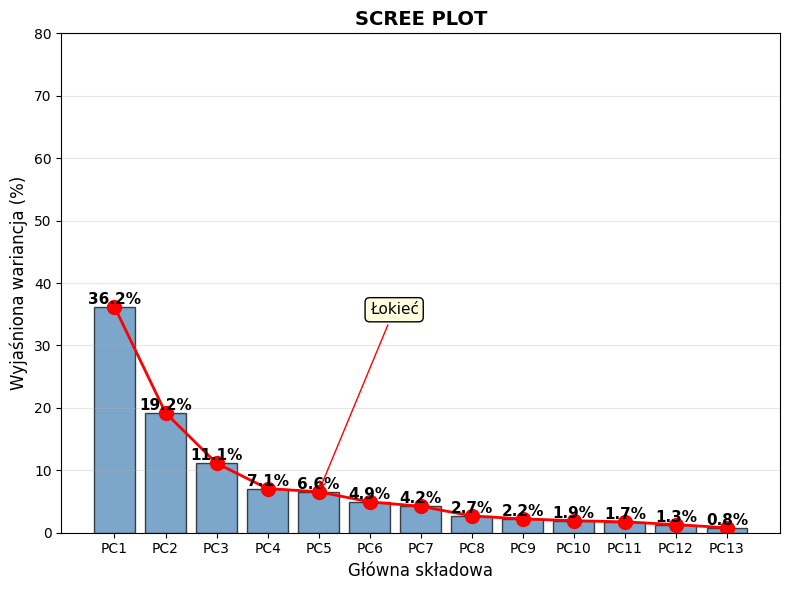

In [46]:
fig, ax1 = plt.subplots(figsize=(8, 6))

pc_labels = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11', 'PC12', 'PC13']

bars = ax1.bar(pc_labels, variance_pct[:13], color='steelblue', edgecolor='black', alpha=0.7)
ax1.plot(pc_labels, variance_pct[:13], 'ro-', markersize=10, linewidth=2)
ax1.set_ylabel('Wyjaśniona wariancja (%)', fontsize=12)
ax1.set_xlabel('Główna składowa', fontsize=12)
ax1.set_title('SCREE PLOT', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 80)

for bar, pct in zip(bars, variance_pct[:13]):
    ax1.annotate(f'{pct:.1f}%', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 ha='center', va='bottom', fontsize=11, fontweight='bold')
ax1.annotate('Łokieć', xy=(4, variance_pct[4]), xytext=(5, 35),
             fontsize=11, arrowprops=dict(arrowstyle='->', color='red'),
             bbox=dict(boxstyle='round', facecolor='lightyellow'))
ax1.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

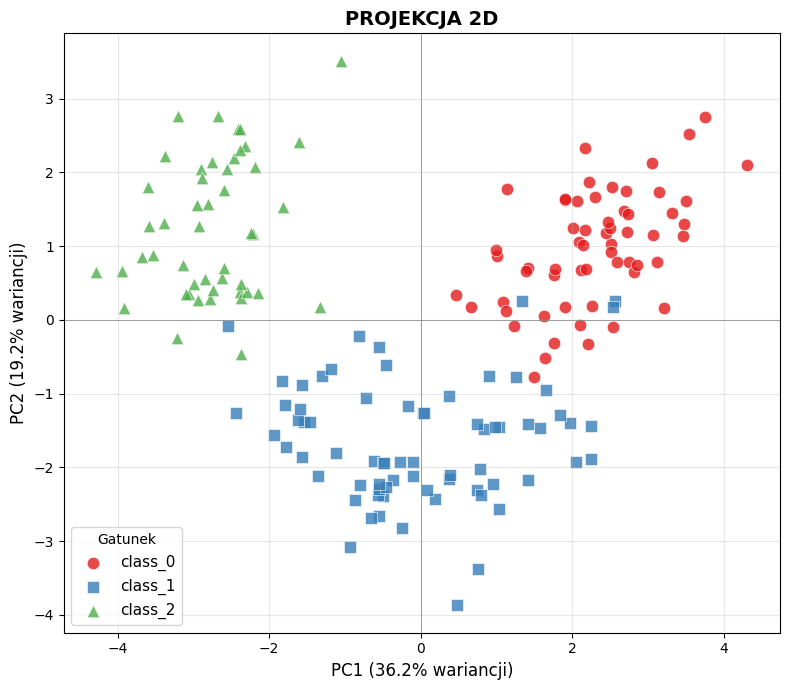

In [47]:
fig, ax3 = plt.subplots(figsize=(8, 7))

for i, (gatunek, kolor, marker) in enumerate(zip(nazwy_gatunkow, colors, markers)):
    mask = y == i
    ax3.scatter(X_pca[mask, 0], X_pca[mask, 1],
                c=kolor, marker=marker, s=80, label=gatunek,
                edgecolor='white', linewidth=0.5, alpha=0.8)

ax3.set_xlabel(f'PC1 ({variance_pct[0]:.1f}% wariancji)', fontsize=12)
ax3.set_ylabel(f'PC2 ({variance_pct[1]:.1f}% wariancji)', fontsize=12)
ax3.set_title('PROJEKCJA 2D', fontsize=14, fontweight='bold')
ax3.legend(title='Gatunek', fontsize=11)
ax3.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
ax3.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

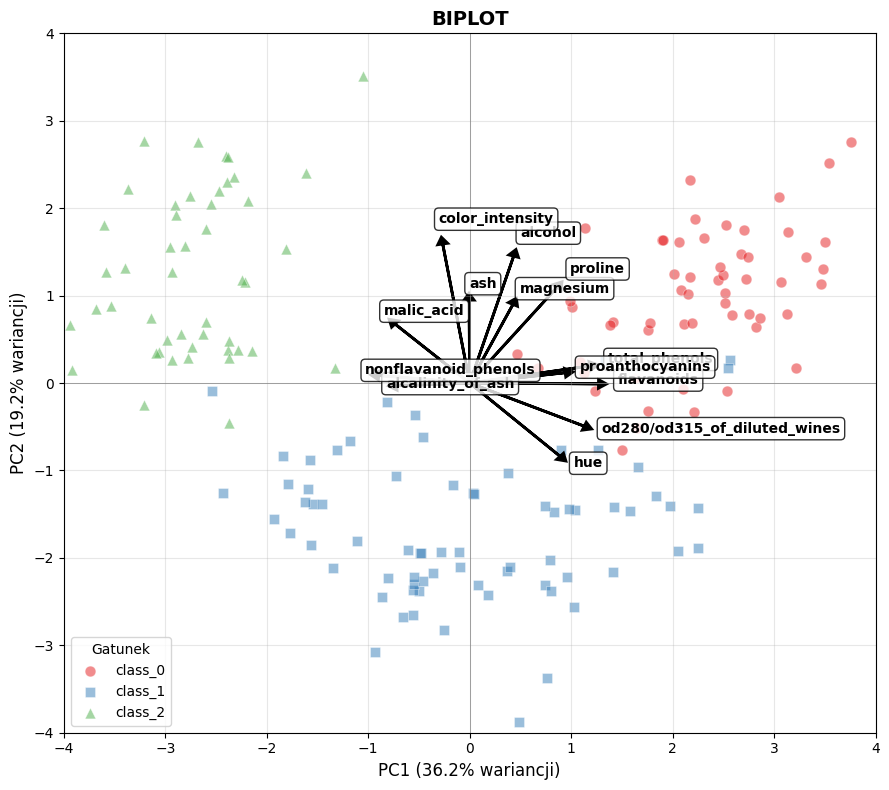

In [48]:
fig, ax4 = plt.subplots(figsize=(9, 8))

for i, (gatunek, kolor, marker) in enumerate(zip(nazwy_gatunkow, colors, markers)):
    mask = y == i
    ax4.scatter(X_pca[mask, 0], X_pca[mask, 1],
                c=kolor, marker=marker, s=60, label=gatunek,
                edgecolor='white', linewidth=0.5, alpha=0.5)

for i, nazwa in enumerate(nazwy_cech):
    if i == 3:
        ax4.arrow(0, 0,
              pca.components_[0, i] * scale,
              pca.components_[1, i] * scale,
              head_width=0.1, head_length=0.08, fc='black', ec='black', linewidth=2)
        ax4.text(pca.components_[0, i] * scale * 1.15,
             pca.components_[1, i] * scale * 1.65,
             nazwa, fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    else:
        ax4.arrow(0, 0,
              pca.components_[0, i] * scale,
              pca.components_[1, i] * scale,
              head_width=0.1, head_length=0.08, fc='black', ec='black', linewidth=2)
        ax4.text(pca.components_[0, i] * scale * 1.15,
             pca.components_[1, i] * scale * 1.15,
             nazwa, fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax4.set_xlabel(f'PC1 ({variance_pct[0]:.1f}% wariancji)', fontsize=12)
ax4.set_ylabel(f'PC2 ({variance_pct[1]:.1f}% wariancji)', fontsize=12)
ax4.set_title('BIPLOT', fontsize=14, fontweight='bold')
ax4.legend(title='Gatunek', fontsize=10, loc='lower left')
ax4.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
ax4.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
ax4.set_xlim(-4, 4)
ax4.set_ylim(-4, 4)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_iris_demo.png', dpi=150, bbox_inches='tight')
plt.show()

In [49]:
print("Ładunki składowych")
print(f"{'Cecha':<20} {'PC1':>8} {'PC2':>8}")
print("-" * 50)
for i, nazwa in enumerate(nazwy_cech):
    loadings = pca.components_[:, i]
    print(f"{nazwa:<20} {loadings[0]:>8.3f} {loadings[1]:>8.3f}")

Ładunki składowych
Cecha                     PC1      PC2
--------------------------------------------------
alcohol                 0.144    0.484
malic_acid             -0.245    0.225
ash                    -0.002    0.316
alcalinity_of_ash      -0.239   -0.011
magnesium               0.142    0.300
total_phenols           0.395    0.065
flavanoids              0.423   -0.003
nonflavanoid_phenols   -0.299    0.029
proanthocyanins         0.313    0.039
color_intensity        -0.089    0.530
hue                     0.297   -0.279
od280/od315_of_diluted_wines    0.376   -0.164
proline                 0.287    0.365


Analiza - odpowiedzi na pytania:

1. Które cechy dominują w PC1? Co reprezentuje ta składowa?

Dominujące cechy dla PC1 to flavanoids (0,423) oraz total_phenols (0,395). Są one związane z fenolami, które są związkami występującymi w skórkach winogron i nadają winu smak oraz kolor wpływając jednocześnie pozytywnie na zdrowie.

2. Które cechy dominują w PC2?

Dominujące cechy dla PC2 to color_intensity (0,530) oraz alcohol (0,484). Wskazuja na intensywność koloru oraz zawartość alkoholu w winie.

3. Czy klasy są dobrze separowalne w 2D?

Tak, na podstawie projekcji 2D można zuważyć, że klasy są dobrze separowalne na podstawie PC1 i PC2.

4. Wyjaśnij różnice - która cecha zdominowała analizę bez standaryzacji?

Patrząc na wartości cech analiza bez standaryzacji zostałaby zdominowana przez cechę proline, która podawana jest w tysiącach, w momencie gdy wartości innych cech podawane są co najwyżej w setkach, a dla większości cech są z zakresu 0-20 - daleko im do tysięcy.